## Problem 2 - Polynomial Regression

Load the file regress1.mat and plot Y as a function of X

Find a least-squares fit of the data with polynomials of order 0, 1, 2, 3, 4, and 5. On a seperate graph, plot the squared error as a function of the order of polynomial

In [209]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [210]:
mat = loadmat('regress1.mat')

In [211]:
x = mat['x'] # Extracts the independent variable data
y = mat['y'] # Extracts the dependent variable data

x_value_max = np.size(x)

Text(0, 0.5, 'Dependent Variable (Arbitrary Units)')

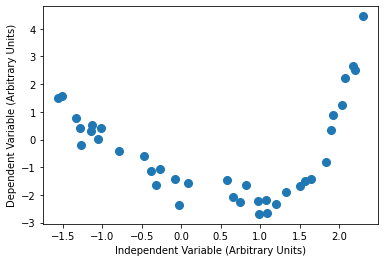

In [212]:
plt.plot(x,y,'o',markersize=8) # Start by plotting x as a function of y to see the shape of the data
plt.xlabel('Independent Variable (Arbitrary Units)')
plt.ylabel('Dependent Variable (Arbitrary Units)')

In [ ]:
numpy.poly1d(numpy.polyfit(x, y, 3))

In [169]:
x = x
x2 = x**2
x3 = x**3
x4 = x**4
x5 = x**5

In [198]:
beta0 = la.inv(x.T@x)@x.T@y
beta1 = la.inv(x.T@x)@x.T@y
beta2 = la.inv(x2.T@x2)@x2.T@y
beta3 = la.inv(x3.T@x3)@x3.T@y
beta4 = la.inv(x4.T@x4)@x4.T@y
beta5 = la.inv(x5.T@x5)@x5.T@y

In [199]:
beta4

array([[0.0881849]])

In [207]:
yreg0 = beta0*x.T
yreg1 = beta0 + beta1*x.T
yreg2 = beta0 + beta1*x.T + beta2*x2.T
yreg3 = beta0 + beta1*x.T + beta2*x2.T + beta3*x3.T
yreg4 = beta0 + beta1*x.T + beta2*x2.T + beta3*x3.T + beta4*x4.T
yreg5 = beta0 + beta1*x.T + beta2*x2.T + beta3*x3.T + beta4*x4.T + beta5*x5.T


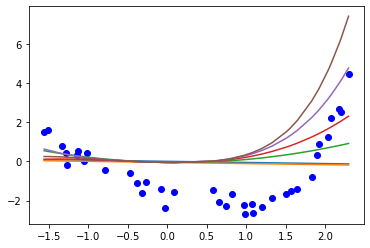

In [208]:
plt.plot(x,y,'bo',x,yreg0.T,x,yreg1.T,x,yreg2.T,x,yreg3.T,x,yreg4.T,x,yreg5.T)

In [213]:
def lin_reg(x,y):
    
    u,s,v = la.svd(x,full_matrices = True)
    s = np.diag(s)
    
    Y_star = u@y
    B_ss = np.array([[Y_star[1:len(s)]],[0]])
    B_star = np.divide(B_ss[1:len(s)],s)
    b = v@B_star
    
    return b